In [161]:
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel, RFECV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import RocCurveDisplay
global X_train, X_test, y_train, y_test


def splitlist(list):
    list1 = []
    list2 = []
    for i in list:
        list1.append(i[0])
        list2.append(i[1])
    return list1, list2


def merge_shuffle(list1, list2):
    list = []
    for i in range(len(list1)):
        list.append(list1[i])
        list.append(list2[i])
    # random.shuffle(list)
    return list


def readfile(file):
    f = open(file, "r")
    result = []
    c = 0
    for i in f:
        if c <= 10000:
            # print(c)
            c += 1
            # print(c)
            list = []
            line = i[1:-3].split(", [")
            # print(line)
            list.append(int(line[0]))
            temp = []
            # print(list)
            for j in line[1].split(", "):
                if "." not in j:
                    temp.append(int(j))
                else:
                    temp.append(float(j))
            # print(temp)
            list.append(temp)
            # print("test")
            result.append(list)
    f.close()
    return result


def selectfeatures(features, indexs):
    result = []
    length = len(features[0])
    for w in features:
        temp = []
        for i in range(1, len(w)+1):
            if i in indexs:
                temp.append(w[i-1])
        result.append(temp)
    return result


def Scale():
    global X_train, X_test
    X_train_svm, X_test_svm = X_train, X_test
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train_svm = scaler.transform(X_train)
    X_test_svm = scaler.transform(X_test)
    return X_train_svm, X_test_svm


def Kbest(X_train_svm, X_test_svm, n):
    sel = SelectKBest(chi2, k=n)
    sel.fit(X_train_svm, y_train)
    # print(sel.scores_)
    X_train_svm = sel.transform(X_train_svm)
    X_test_svm = sel.transform(X_test_svm)
    return X_train_svm, X_test_svm

def accuracyCM(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

def MYSVM():
    X = Scale()
    X = Kbest(X[0], X[1], 52)
    X_train_svm = X[0]
    X_test_svm = X[1]
    #print("Training samples SVM: ", X_train_svm.shape)
    clf = svm.SVC(kernel='rbf',probability=True, gamma=0.7, C=200)
    print("traning...")
    clf.fit(X_train_svm, y_train)
    y_pred = clf.predict(X_test_svm)
    print("Accuracy linear SVM : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(clf, X_test_svm, y_test)
    plt.show()
    plotthreshold(clf,X_test_svm)


def KNN(n):
    X = Scale()
    X = Kbest(X[0], X[1], 48)
    X_train_svm = X[0]
    X_test_svm = X[1]
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train_svm,y_train)
    y_pred = model.predict(X_test_svm)
    print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred))
    svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    plt.show()
    return metrics.accuracy_score(y_test, y_pred)

def RandomForest(n=54):
    t = idx[:n]
    print("traning...")
    rf_w = RandomForestClassifier(random_state=100, n_estimators=100)
    rf_w.fit(X_train, y_train)
    y_pred_rf_w = rf_w.predict(X_test)
    print("Accuracy Random Forest : ",
          metrics.accuracy_score(y_test, y_pred_rf_w))
    conf_mat = confusion_matrix(y_test, y_pred_rf_w)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf_w))
    print("NPV= ", NPV(conf_mat))
    # plot Importances
    importances = rf_w.feature_importances_
    final_df = pd.DataFrame(
        {"Features": t, "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()
   
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(n):
    X = Scale()
    X = Kbest(X[0], X[1], n)
    X_train_svm = X[0]
    X_test_svm = X[1]
    model = LinearDiscriminantAnalysis()
    model.fit(X_train_svm, y_train)
    y_pred = model.predict(X_test_svm)
    #print("Accuracy Knn : ", metrics.accuracy_score(y_test, y_pred))
    #conf_mat = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix:")
    #print(conf_mat)
    #print(classification_report(y_test, y_pred))
    #svc_disp = RocCurveDisplay.from_estimator(model, X_test_svm, y_test)
    #plt.show()
    return metrics.accuracy_score(y_test, y_pred)

def RFRFECV():
    model_tree = RandomForestClassifier(n_estimators=100, random_state=100)
    print("RFECV")
    sel_rfe_tree = RFECV(estimator=model_tree, step=1)
    print("traning...")
    X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
    print("Training Samples: ", X_train_rfe_tree.shape)
    print(sel_rfe_tree.get_support())
    # print(sel_rfe_tree.grid_scores_)
    # print(X_train_rfe_tree.shape)
    # print(sel_rfe_tree.ranking_)
    y_pred_rf = sel_rfe_tree.predict(X_test)
    print("Accuracy Random Forest with RFECV : ",
          metrics.accuracy_score(y_test, y_pred_rf))
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix:")
    print(conf_mat)
    print(classification_report(y_test, y_pred_rf))
    importances = model_tree.feature_importances_
    final_df = pd.DataFrame(
        {"Features": idx[:43], "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values('Importances')
    plt.figure(figsize=(10, 3))
    plt.xticks(rotation=45)
    sns.barplot(x="Features", y="Importances", data=final_df)
    plt.show()

#function to compute NPV USING CONFUSION MATRIX OF SKLEARN
def NPV(conf_mat):
    TN = conf_mat[0][0]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    TP = conf_mat[1][1]
    NPV = TN / (TN + FN)
    return NPV

def plotthreshold(rf_w,X_test):
    thresholds = []
    acc=[]
    npvs=[]
    temp=0
    temp2=0
    threshold = 0.1
    while(threshold <= 0.5):
          predicted_proba = rf_w.predict_proba(X_test)
          predicted = (predicted_proba [:,1] >= threshold).astype('int')
          accuracy = metrics.accuracy_score(y_test, predicted)
          conf_mat = confusion_matrix(y_test, predicted)
          npv=NPV(conf_mat)
          acc.append(accuracy)
          npvs.append(npv)
          y=acc
          thresholds.append(float(f"{threshold:.3f}"))
          threshold+=0.05

    x=np.arange(len(thresholds))
    ax = plt.subplot(111)
    ax.bar(x-0.2, acc, width=0.3, color='b', align='center', label="Accuracy")
    ax.bar(x+0.2, npvs, width=0.3, color='r', align='center', label="NPV")
    plt.xticks(x, thresholds)
    for index, value in enumerate(acc):
        plt.text(x[index]-0.4, value+0.01, str(float(f"{value:.3f}")))
    for index, value in enumerate(npvs):
        plt.text(x[index], value+0.02, str(float(f"{value:.3f}")))
    plt.legend()
    plt.show()


idx = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
mal = splitlist(readfile("malfeatures.txt"))
beg = splitlist(readfile("begfeatures.txt"))
features = merge_shuffle(mal[1], beg[1])
labels = merge_shuffle(mal[0], beg[0])
#features = selectfeatures(features, indexes)
features = np.array(features)
print("Number of samples", len(features))

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.3, random_state=109)
print("Shape of samples", X_train.shape)

var_thr = VarianceThreshold(threshold=0.0)
X_train = var_thr.fit_transform(X_train)
X_test = var_thr.fit_transform(X_test)
print("Traning samples:", X_train.shape)
print("Testing Samples: ", X_test.shape)

Number of samples 20000
Shape of samples (14000, 54)
Traning samples: (14000, 52)
Testing Samples:  (6000, 52)


In [129]:
print("traning...")
rf_w = RandomForestClassifier(random_state=100, bootstrap=True,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 100)
rf_w.fit(X_train, y_train)
y_pred_rf_w = rf_w.predict(X_test)
print("Accuracy Random Forest : ",
      metrics.accuracy_score(y_test, y_pred_rf_w))
conf_mat = confusion_matrix(y_test, y_pred_rf_w)
predicted_proba = rf_w.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= 0.5).astype('int')
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)


traning...
Accuracy Random Forest :  0.9478333333333333
0.9475


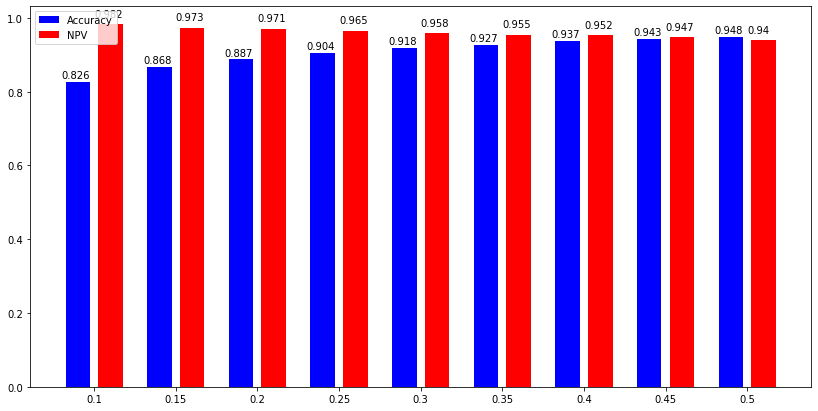

traning...
Accuracy linear SVM :  0.9233333333333333
Confusion Matrix:
[[2883  167]
 [ 293 2657]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3050
           1       0.94      0.90      0.92      2950

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



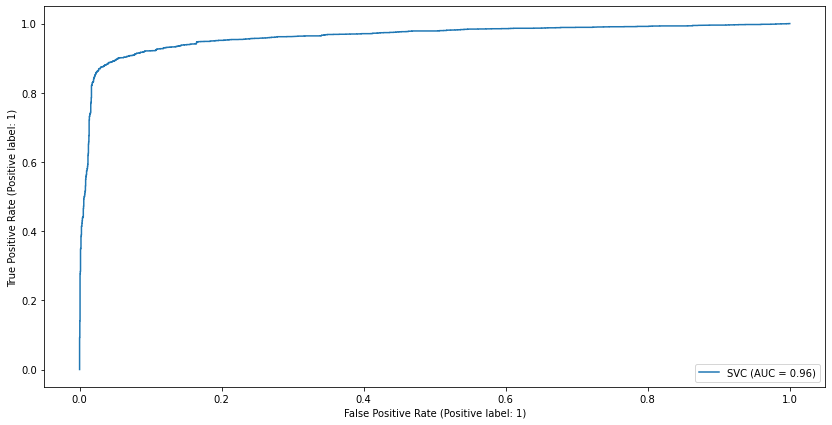

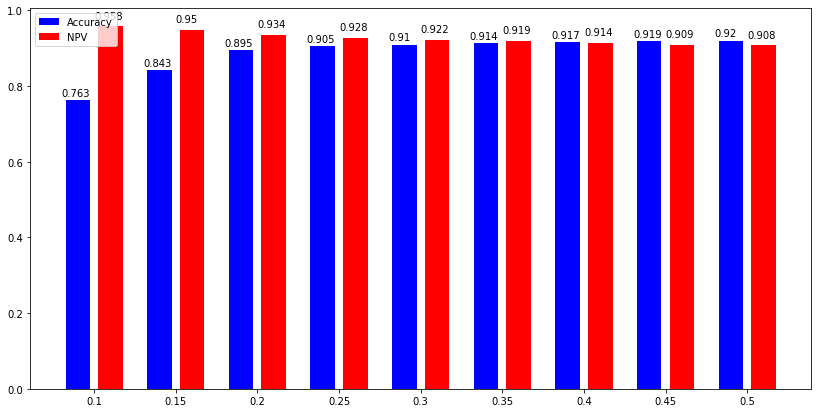

In [162]:

plotthreshold(rf_w,X_test)
MYSVM()